In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
#Loading predefined Boston Dataset
boston_dataset = datasets.load_boston()

In [7]:
#Load the dataset
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)


#input
X = boston_pd.iloc[:, :-1]

#output
Y = boston_pd.iloc[:, -1]

print(boston_pd.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  House Price  
0     15.3  396.90   4.98         24.0  
1     17.8  396.90   9.14         21.6  
2     17.8  392.83   4.03         34.7  
3     18.7  394.63   2.94         33.4  
4     18.7  396.90   5.33         36.2  


In [10]:
x_train, x_test, y_train, y_test = train_test_split(
boston_pd.iloc[:, :-1], boston_pd.iloc[:, -1], test_size=0.25)

print("Train data shape of X = % s and Y = % s : "%(
x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
x_test.shape, y_test.shape))

Train data shape of X = (379, 13) and Y = (379,) : 
Test data shape of X = (127, 13) and Y = (127,) : 


In [13]:
#Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(x_train, y_train)


#Generate Prediction on test set
lreg_y_pred = lreg.predict(x_test)

#Calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set :", mean_squared_error)
                             
#Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient["Columns"] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)                            
print(lreg_coefficient)




Mean squared Error on test set : 30.53337626064495
    Columns  Coefficient Estimate
0      CRIM             -0.087310
1        ZN              0.041444
2     INDUS              0.053771
3      CHAS              2.308776
4       NOX            -15.077593
5        RM              4.104497
6       AGE              0.004581
7       DIS             -1.302214
8       RAD              0.230410
9       TAX             -0.010948
10  PTRATIO             -0.905465
11        B              0.006189
12    LSTAT             -0.599434


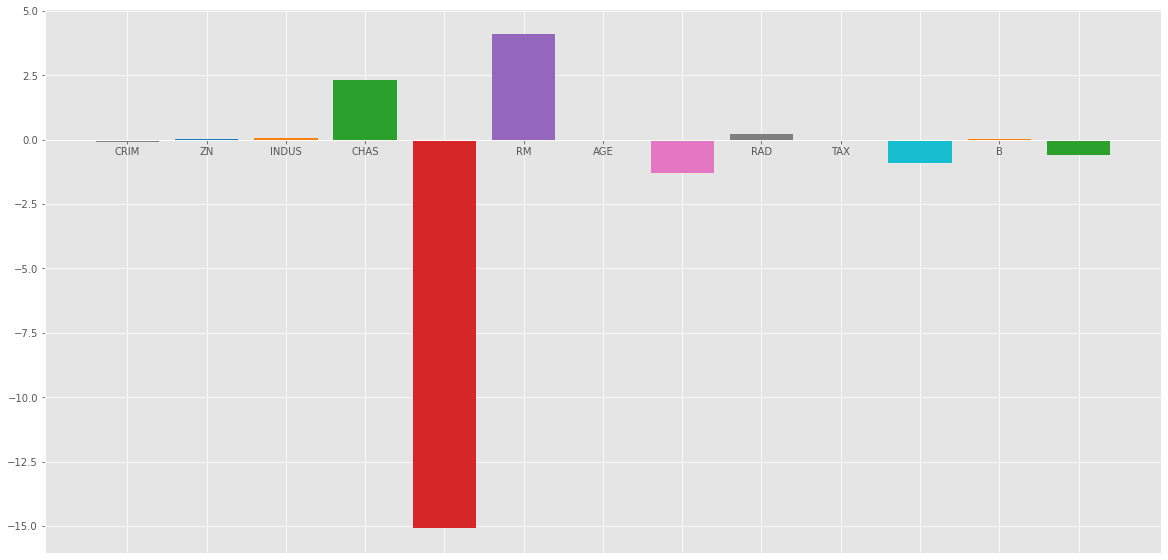

In [16]:
#Plotting the coefficient score
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", 'tab:pink',"tab:gray", "tab:olive", "tab:cyan","tab:orange","tab:green","tab:blue","tab:olive"]
ax.bar(lreg_coefficient["Columns"], 
      lreg_coefficient['Coefficient Estimate'],
      color = color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [17]:
#import ridge regression from sklearn library
from sklearn.linear_model import Ridge

#Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)


#calculate mean square error
mean_squared_error_ridge  = np.mean((y_pred - y_test)**2)
print("Mean squared error in test set", mean_squared_error_ridge)


#get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]=x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)


Mean squared error in test set 31.256930554134538
    Columns  Coefficient Estimate
0      CRIM             -0.081468
1        ZN              0.042374
2     INDUS              0.025622
3      CHAS              2.156716
4       NOX             -8.095785
5        RM              4.156012
6       AGE             -0.001313
7       DIS             -1.193885
8       RAD              0.211982
9       TAX             -0.011435
10  PTRATIO             -0.827509
11        B              0.006432
12    LSTAT             -0.612089


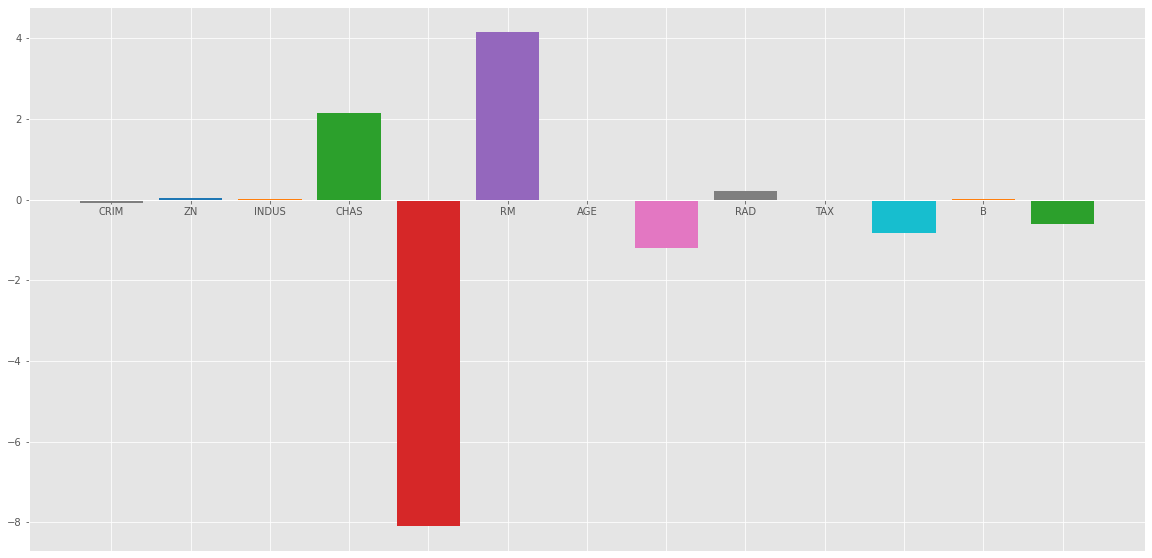

In [18]:
#Plotting the coefficient score
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", 'tab:pink',"tab:gray", "tab:olive", "tab:cyan","tab:orange","tab:green","tab:blue","tab:olive"]
ax.bar(ridge_coefficient["Columns"], 
      ridge_coefficient['Coefficient Estimate'],
      color = color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [19]:
#import Lasso Regression from sklearn library
from sklearn.linear_model import Lasso 

#Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

#Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = x_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 36.450309098621645
    Columns  Coefficient Estimate
0      CRIM             -0.039261
1        ZN              0.040395
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.172148
6       AGE              0.026457
7       DIS             -0.553538
8       RAD              0.162597
9       TAX             -0.011280
10  PTRATIO             -0.661058
11        B              0.006103
12    LSTAT             -0.833222


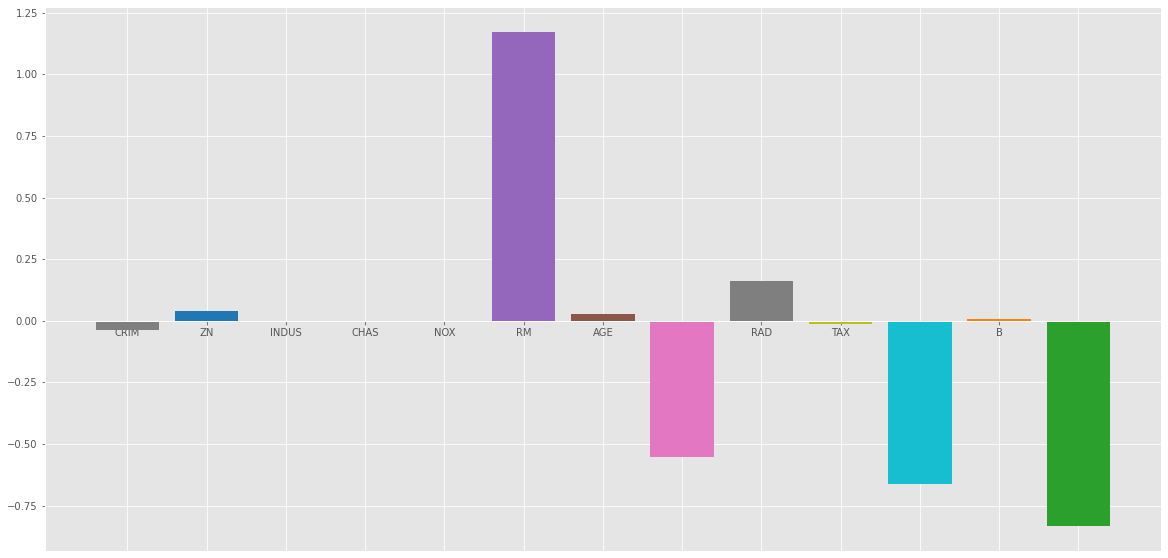

In [20]:
#Plotting the coefficient score
fig, ax = plt.subplots(figsize = (20, 10))

color = ['tab:gray', 'tab:blue', "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", 'tab:pink',"tab:gray", "tab:olive", "tab:cyan","tab:orange","tab:green","tab:blue","tab:olive"]
ax.bar(lasso_coeff["Columns"], 
      lasso_coeff['Coefficient Estimate'],
      color = color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()